In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

In [2]:
fashio_data = tf.keras.datasets.fashion_mnist

(X_train,y_train),(X_test,y_test) = fashio_data.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train = tf.keras.utils.normalize(X_train,axis=1)
X_test = tf.keras.utils.normalize(X_test,axis=1)

In [6]:
np.pad(X_train,(1,1),'edge')
np.pad(X_test,(1,1),'edge')

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [7]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

In [8]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(10))

In [9]:
model.compile(
    
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [10]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 26s 13ms/step - loss: 0.5269 - accuracy: 0.8024
Epoch 2/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3455 - accuracy: 0.8723
Epoch 3/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3035 - accuracy: 0.8873
Epoch 4/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2739 - accuracy: 0.8979
Epoch 5/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2511 - accuracy: 0.9061


In [11]:
predictions = model.predict(X_test)

313/313 [==============================] - 2s 7ms/step


Predicted class :  4
Real class :  4


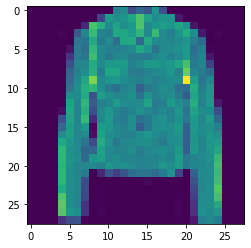

In [12]:
print("Predicted class : ",np.argmax(predictions[10]))

print("Real class : ",y_test[10])

plt.imshow(X_test[10])

Predicted class :  9
Real class :  9


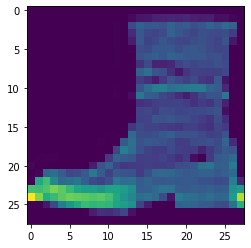

In [13]:
print("Predicted class : ",np.argmax(predictions[291]))

print("Real class : ",y_test[291])

plt.imshow(X_test[291])